import numpy as np import pandas as pd import seaborn as sns import
matplotlib.pyplot as plt from sklearn.preprocessing import
StandardScaler from sklearn.model_selection import train_test_split from
sklearn.metrics import classification_report, confusion_matrix from
xgboost import XGBClassifier \# Import XGBoost

# Load dataset

data = pd.read_csv(“/content/Epileptic Seizure Recognition.csv”)

# Drop unnecessary column if it exists

if ‘Unnamed’ in data.columns: data.drop(\[‘Unnamed’\], axis=1,
inplace=True)

# Separate features and target variable

X = data.iloc\[:, :-1\] y = data\[‘y’\]

# Standardize the features

scaler = StandardScaler() X_scaled = scaler.fit_transform(X)

# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
test_size=0.2, random_state=42)

# Train XGBoost model

xgb_model = XGBClassifier(use_label_encoder=False,
eval_metric=‘mlogloss’) xgb_model.fit(X_train, y_train)

# Make predictions

y_pred = xgb_model.predict(X_test)

# Print evaluation metrics

print(“Confusion Matrix:”, confusion_matrix(y_test, y_pred))
print(“Classification Report:”, classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:54:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.6839130434782609
F1 Score: 0.6861786262508167
Confusion Matrix:
 [[430  14  10  11   0]
 [ 11 256 149  10  33]
 [  3 139 241  18  49]
 [  0   4  15 331 107]
 [  0  29  61  64 315]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.95       465
           1       0.58      0.56      0.57       459
           2       0.51      0.54      0.52       450
           3       0.76      0.72      0.74       457
           4       0.62      0.67      0.65       469

    accuracy                           0.68      2300
   macro avg       0.69      0.68      0.69      2300
weighted avg       0.69      0.68      0.69      2300



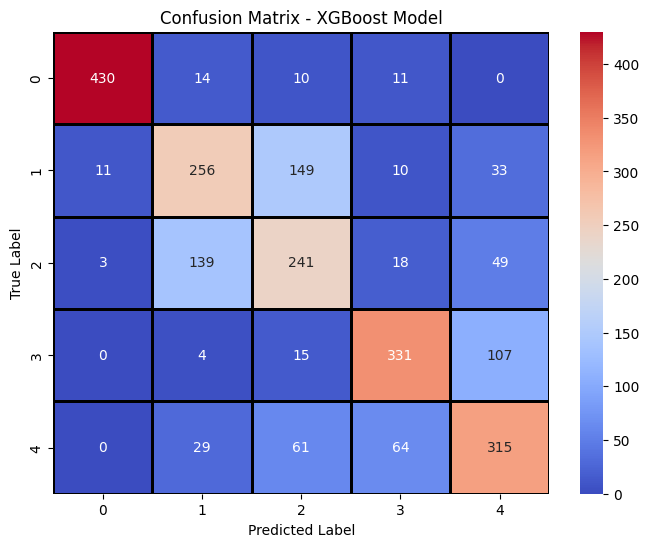

<ipython-input-5-87ec4736893f>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")


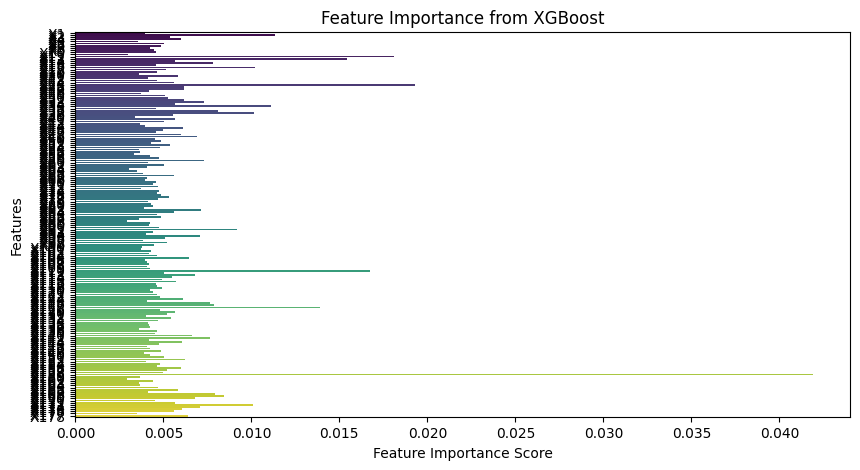

<ipython-input-5-87ec4736893f>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette="magma")


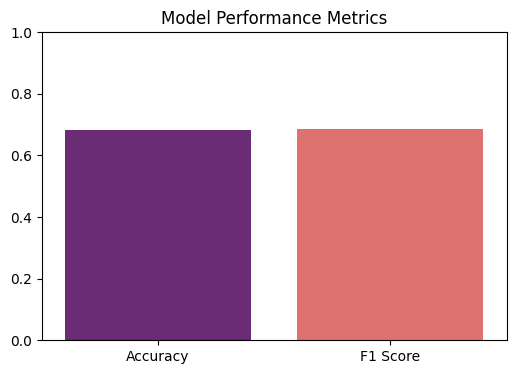

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from xgboost import XGBClassifier

# Load dataset
data = pd.read_csv("/Epileptic Seizure Recognition.csv")

# Drop unnecessary column if it exists
if 'Unnamed' in data.columns:
    data.drop(['Unnamed'], axis=1, inplace=True)

# Separate features and target variable
X = data.iloc[:, :-1]
y = data['y']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Encode target labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', linewidths=1, linecolor='black')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost Model")
plt.show()

# Feature Importance
plt.figure(figsize=(10, 5))
importances = xgb_model.feature_importances_
feature_names = data.columns[:-1]
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance from XGBoost")
plt.show()

# Accuracy and F1 Score Bar Graph
metrics = ["Accuracy", "F1 Score"]
values = [acc, f1]
plt.figure(figsize=(6, 4))
sns.barplot(x=metrics, y=values, palette="magma")
plt.ylim(0, 1)
plt.title("Model Performance Metrics")
plt.show()
